In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# data
- price data는 2017-08-07 ~ 2022-08-05 기간의 코스피 코스닥 종목들

In [69]:
kor_ticker = pd.read_pickle("./data/kor_ticker.pkl")
kor_fs = pd.read_pickle("./data/kor_fs.pkl")
kor_price = pd.read_pickle("./data/kor_price.pkl")
kor_sector = pd.read_pickle("./data/kor_sector.pkl")
kor_value = pd.read_pickle("./data/kor_value.pkl")

In [70]:
kor_kospi = kor_ticker[kor_ticker['시장구분'] == 'KOSPI']

value_table = pd.pivot_table(kor_value, index = '종목코드', columns = '지표').reset_index()
value_table.columns = ['종목코드', 'DY','PBR','PCR','PER','PSR']
data_value = pd.merge(kor_kospi[['종목코드','종목명','시장구분']], value_table ,on='종목코드')

data_value.loc[data_value['DY'] <=0,'DY'] = np.nan
data_value.loc[data_value['PBR'] <=0,'PBR'] = np.nan
data_value.loc[data_value['PCR'] <=0,'PCR'] = np.nan
data_value.loc[data_value['PER'] <=0,'PER'] = np.nan
data_value.loc[data_value['PSR'] <=0,'PSR'] = np.nan

data_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 0 to 791
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목코드    792 non-null    object 
 1   종목명     792 non-null    object 
 2   시장구분    792 non-null    object 
 3   DY      563 non-null    float64
 4   PBR     791 non-null    float64
 5   PCR     558 non-null    float64
 6   PER     628 non-null    float64
 7   PSR     743 non-null    float64
dtypes: float64(5), object(3)
memory usage: 55.7+ KB


### price data
- KOSPI
- value기준

In [71]:
price_pivot = pd.pivot_table(kor_price, index = '날짜', values='종가', columns='종목코드')
price_pivot.head()

종목코드,000020,000040,000050,000060,000070,000080,000100,000120,000140,000150,...,389260,391710,396270,396300,397030,399720,402030,402340,403870,412350
날짜,,,,,,,,,,,,,,,,,,,,,
2017-08-07,8380.0,4918.0,15950.0,24300.0,116000.0,23650.0,36417.0,180000.0,11300.0,101224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,8330.0,4856.0,15650.0,24300.0,119000.0,23700.0,36980.0,172000.0,11200.0,102012.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,8150.0,4783.0,15350.0,24450.0,120000.0,23500.0,36900.0,171000.0,11200.0,104375.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,8200.0,4759.0,15300.0,24100.0,120000.0,23800.0,36498.0,174000.0,11400.0,105163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-11,8130.0,4294.0,14850.0,24000.0,122500.0,23600.0,35936.0,168500.0,11150.0,103587.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
data_value_list = list(data_value['종목코드'].values)
price_list = list(price_pivot.columns)
price_exist = [i for i in data_value_list if i in price_list]

In [74]:
len(price_exist)

792

In [75]:
price_kospi = price_pivot[price_exist]
price_kospi.info()

ret_kospi = price_kospi.pct_change().cumsum()
ret_kospi.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 1229 entries, 2017-08-07 to 2022-08-05
Columns: 792 entries, 000020 to 402340
dtypes: float64(792)
memory usage: 7.4+ MB


종목코드,000020,000040,000050,000060,000070,000080,000100,000120,000140,000150,...,363280,372910,373220,375500,377300,378850,381970,383220,383800,402340
날짜,,,,,,,,,,,,,,,,,,,,,
2022-08-01,0.836074,-1.082541,0.114828,0.644446,-0.030707,0.480744,0.717643,-0.225213,0.318508,0.246163,...,-0.319441,-0.679694,-0.135205,-0.342305,-1.000435,-0.680306,0.002594,0.788398,-0.270708,-0.511458
2022-08-02,0.821651,-1.101851,0.110981,0.637114,-0.048251,0.498986,0.708902,-0.233946,0.309997,0.233433,...,-0.324832,-0.676065,-0.141164,-0.353201,-1.003708,-0.680306,0.133029,0.788398,-0.276402,-0.540905
2022-08-03,0.855797,-1.113103,0.103259,0.705061,-0.052372,0.516902,0.701847,-0.216325,0.327165,0.252058,...,-0.322122,-0.681490,-0.093203,-0.350753,-0.949521,-0.674466,0.092305,0.779023,-0.270675,-0.526342
2022-08-04,0.860514,-1.115948,0.118824,0.692613,-0.056510,0.513702,0.732042,-0.220654,0.322945,0.247838,...,-0.316717,-0.666944,-0.079473,-0.350753,-0.799988,-0.668661,0.052211,0.779023,-0.277509,-0.521557
2022-08-05,0.874599,-1.103109,0.130318,0.708019,-0.034349,0.520122,0.737215,-0.225002,0.322945,0.256313,...,-0.300588,-0.659776,-0.072701,-0.327554,-0.813539,-0.661446,0.093980,0.763250,-0.272922,-0.506081


# Value

## PER

In [87]:
per_dropna = data_value.dropna(subset='PER')
per_sorted = per_dropna.sort_values(by='PER',ascending=False)
per_sorted.reset_index(inplace=True)
per_sorted

,index,종목코드,종목명,시장구분,DY,PBR,PCR,PER,PSR
0,176,004140,동방,KOSPI,NaN,1.0610,6.2673,453.3333,0.2130
1,635,093240,형지엘리트,KOSPI,NaN,0.8704,5.3119,265.5945,0.4036
2,298,008730,율촌화학,KOSPI,0.0208,1.7554,16.5219,259.3217,1.1055
3,547,047400,유니온머티리얼,KOSPI,0.0109,1.6180,103.7077,224.7000,1.1078
4,523,035250,강원랜드,KOSPI,NaN,1.6954,20.5159,224.4192,5.9907
...,...,...,...,...,...,...,...,...,...
623,464,023960,에쓰씨엔지니어링,KOSPI,NaN,0.8170,0.8170,0.8170,0.8170
624,268,007110,일신석재,KOSPI,NaN,2.1215,13.7701,0.6534,1.4318
625,385,013000,세우글로벌,KOSPI,NaN,0.5764,0.5764,0.5764,0.5764
626,337,010420,한솔PNS,KOSPI,0.0155,0.5218,0.5218,0.5218,0.5218


In [88]:
per_sorted = per_sorted[['종목코드','PER']]
per_sorted

,종목코드,PER
0,004140,453.3333
1,093240,265.5945
2,008730,259.3217
3,047400,224.7000
4,035250,224.4192
...,...,...
623,023960,0.8170
624,007110,0.6534
625,013000,0.5764
626,010420,0.5218


In [89]:
q10=per_sorted['PER'].quantile(q=1, interpolation='nearest')
q8=per_sorted['PER'].quantile(q=0.8, interpolation='nearest')
q6=per_sorted['PER'].quantile(q=0.6, interpolation='nearest')
q4= per_sorted['PER'].quantile(q=0.4, interpolation='nearest')
q2 = per_sorted['PER'].quantile(q=0.2, interpolation='nearest')

In [90]:
q10_8 = per_sorted.iloc[per_sorted[per_sorted['PER'] == q10].index[0]:per_sorted[per_sorted['PER'] == q8].index[0],:]
q8_6 = per_sorted.iloc[per_sorted[per_sorted['PER'] == q8].index[0]:per_sorted[per_sorted['PER'] == q6].index[0],:]
q6_4 = per_sorted.iloc[per_sorted[per_sorted['PER'] == q6].index[0]:per_sorted[per_sorted['PER'] == q4].index[0],:]
q4_2 = per_sorted.iloc[per_sorted[per_sorted['PER'] == q4].index[0]:per_sorted[per_sorted['PER'] == q2].index[0],:]
q2_0 = per_sorted.iloc[per_sorted[per_sorted['PER'] == q2].index[0]:,:]

In [93]:
q10_8_ticker_list = [i for i in q10_8['종목코드']]
q10_8_ret_sum = ret_kospi[q10_8_ticker_list].sum(axis=1)

q8_6_ticker_list = [i for i in q8_6['종목코드']]
q8_6_ret_sum = ret_kospi[q8_6_ticker_list].sum(axis=1)

q6_4_ticker_list = [i for i in q6_4['종목코드']]
q6_4_ret_sum = ret_kospi[q6_4_ticker_list].sum(axis=1)

q4_2_ticker_list = [i for i in q4_2['종목코드']]
q4_2_ret_sum = ret_kospi[q4_2_ticker_list].sum(axis=1)

q2_0_ticker_list = [i for i in q2_0['종목코드']]
q2_0_ret_sum = ret_kospi[q2_0_ticker_list].sum(axis=1)

In [95]:
per_assorted = pd.DataFrame({'q10_8':q10_8_ret_sum, 'q8_6':q8_6_ret_sum, 
                             'q6_4':q6_4_ret_sum, 'q4_2':q4_2_ret_sum, 
                             'q2_0':q2_0_ret_sum})

per_assorted

,q10_8,q8_6,q6_4,q4_2,q2_0
날짜,,,,,
2017-08-07,0.000000,0.000000,0.000000,0.000000,0.000000
2017-08-08,-0.035382,-0.158473,0.026249,0.090361,0.033871
2017-08-09,-1.043962,-0.873669,-0.637804,-0.623503,-1.101835
2017-08-10,-1.790574,-1.130666,-1.249092,-1.444310,-1.759277
2017-08-11,-3.479726,-2.562436,-2.750713,-3.104021,-3.413179
...,...,...,...,...,...
2022-08-01,88.555740,77.445967,54.331414,32.479912,33.705268
2022-08-02,88.131133,76.818338,53.831561,31.475578,32.837995
2022-08-03,89.138400,78.040685,54.864880,32.987133,33.315049


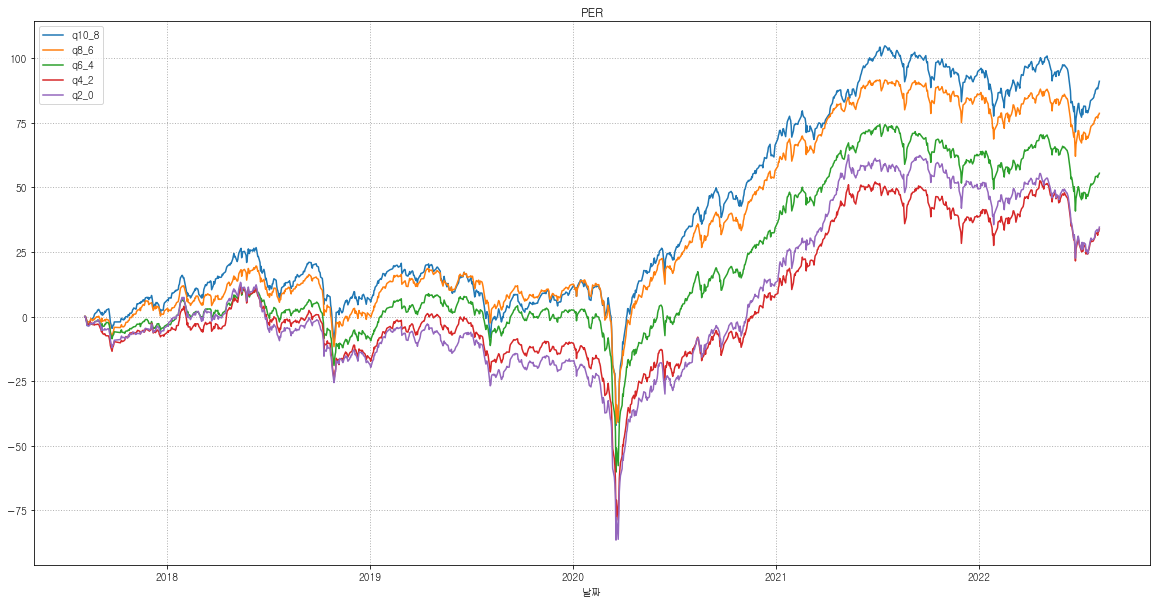

In [121]:
per_assorted.plot(legend=True, figsize=(20,10), title ='PER');
plt.grid(True, color = '0.7', linestyle =':', linewidth=1)
plt.show();

### 함수화
1. 지표에 따라 분위수 나누기
2. 분위에 해당하는 종목의 티커 누적 수익률 데이터와 연동
3. 각 분위에 해당하는 누적 수익률 모두 sum하고 DataFrame으로 묶기(※평균 아니고 단순히 더함)
4. plot

In [122]:
def quantile_plot(df, col):
    q10=df[col].quantile(q=1, interpolation='nearest')
    q8 =df[col].quantile(q=0.8, interpolation='nearest')
    q6 =df[col].quantile(q=0.6, interpolation='nearest')
    q4 =df[col].quantile(q=0.4, interpolation='nearest')
    q2 =df[col].quantile(q=0.2, interpolation='nearest')

    q10_8 = df.iloc[df[df[col] == q10].index[0]:df[df[col] == q8].index[0],:]
    q8_6 = df.iloc[df[df[col] == q8].index[0]:df[df[col] == q6].index[0],:]
    q6_4 = df.iloc[df[df[col] == q6].index[0]:df[df[col] == q4].index[0],:]
    q4_2 = df.iloc[df[df[col] == q4].index[0]:df[df[col] == q2].index[0],:]
    q2_0 = df.iloc[df[df[col] == q2].index[0]:,:]
    
    q10_8_ticker_list = [i for i in q10_8['종목코드']]
    q10_8_ret_sum = ret_kospi[q10_8_ticker_list].sum(axis=1)
    
    q8_6_ticker_list = [i for i in q8_6['종목코드']]
    q8_6_ret_sum = ret_kospi[q8_6_ticker_list].sum(axis=1)

    q6_4_ticker_list = [i for i in q6_4['종목코드']]
    q6_4_ret_sum = ret_kospi[q6_4_ticker_list].sum(axis=1)

    q4_2_ticker_list = [i for i in q4_2['종목코드']]
    q4_2_ret_sum = ret_kospi[q4_2_ticker_list].sum(axis=1)

    q2_0_ticker_list = [i for i in q2_0['종목코드']]
    q2_0_ret_sum = ret_kospi[q2_0_ticker_list].sum(axis=1)
    
    df_last = pd.DataFrame({'q10_8':q10_8_ret_sum, 'q8_6':q8_6_ret_sum, 
                             'q6_4':q6_4_ret_sum, 'q4_2':q4_2_ret_sum, 
                             'q2_0':q2_0_ret_sum})

    df_last.plot(legend=True, figsize=(20,10), title =f'{col}');
    plt.grid(True, color = '0.7', linestyle =':', linewidth=1)
    plt.show();

# PBR
- 함수 활용

In [123]:
pbr_dropna = data_value.dropna(subset='PBR')
pbr_sorted = per_dropna.sort_values(by='PBR',ascending=False)
pbr_sorted.reset_index(inplace=True)

pbr_sorted = pbr_sorted[['종목코드','PBR']]
pbr_sorted

,종목코드,PBR
0,207940,13.0463
1,383220,12.5981
2,005690,10.5041
3,373220,8.7997
4,005070,8.5791
...,...,...
623,001040,0.1386
624,058650,0.1366
625,000150,0.1339
626,000880,0.1055


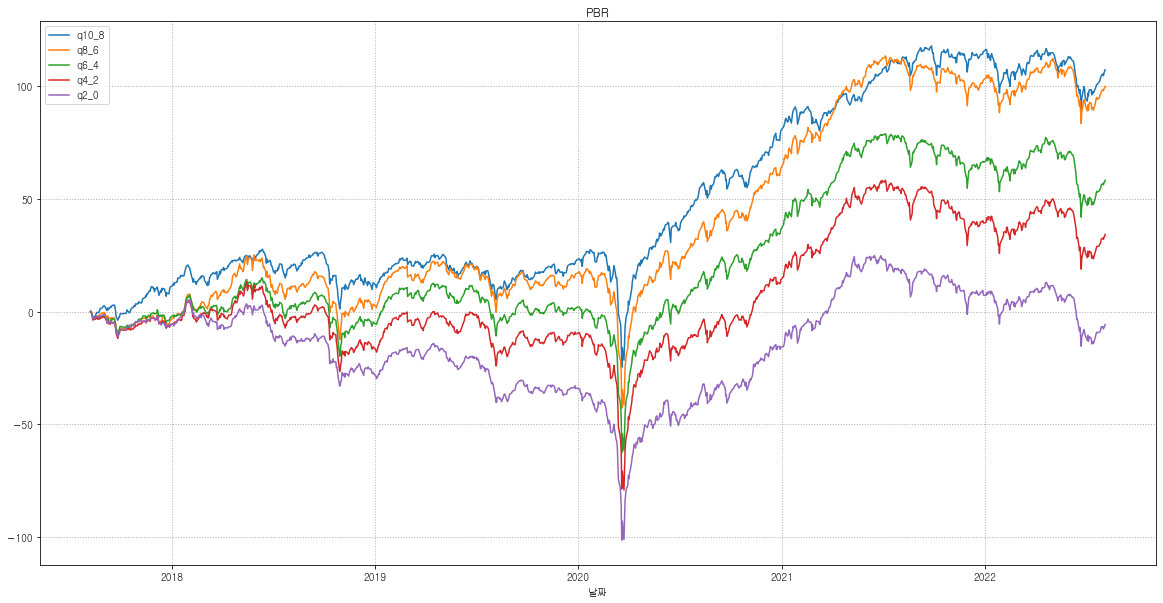

In [124]:
quantile_plot(pbr_sorted,'PBR')

# PCR

In [125]:
PCR_dropna = data_value.dropna(subset='PCR')
PCR_sorted = PCR_dropna.sort_values(by='PCR',ascending=False)
PCR_sorted.reset_index(inplace=True)

PCR_sorted = PCR_sorted[['종목코드','PCR']]
PCR_sorted.head()

,종목코드,PCR
0,005690,3492.610
1,000100,2061.465
2,005420,1284.802
3,128820,753.170
4,005070,703.740


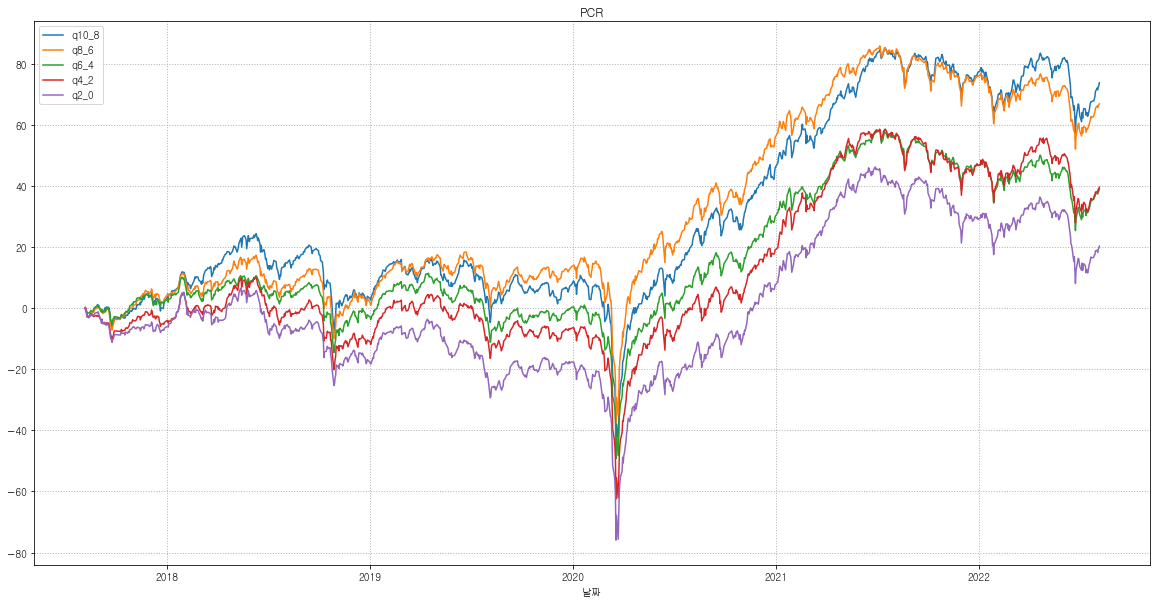

In [126]:
quantile_plot(PCR_sorted,'PCR')

# PSR

In [127]:
PSR_dropna = data_value.dropna(subset='PSR')
PSR_sorted = PSR_dropna.sort_values(by='PSR',ascending=False)
PSR_sorted.reset_index(inplace=True)

PSR_sorted = PSR_sorted[['종목코드','PSR']]
PSR_sorted.head()

,종목코드,PSR
0,207940,34.0900
1,363280,25.0583
2,011000,24.7800
3,326030,18.6355
4,039130,18.5325


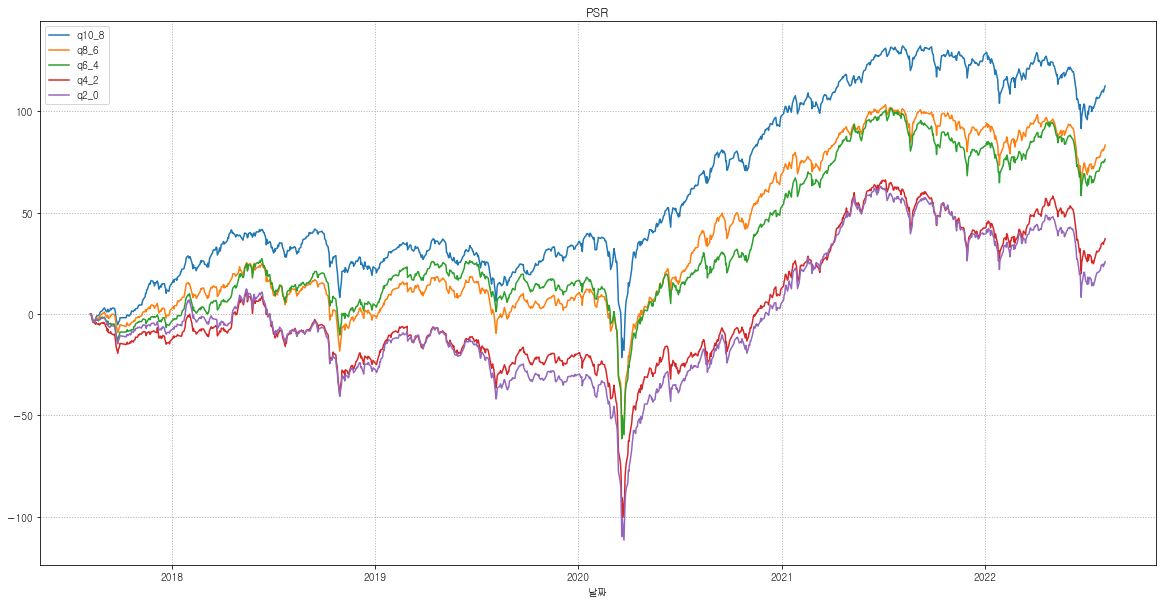

In [128]:
quantile_plot(PSR_sorted,'PSR')